In [2]:
import pandas as pd

In [3]:
ds = pd.read_csv('./trajectory/dataset.csv')

In [4]:
rt = pd.read_csv('./trajectory/ref_traj.csv')

In [5]:
rt

,curLapTime,Acceleration_x,Acceleration_y,speed_x,speed_y,xCarWorld,yCarWorld,alpha_step
0,0.004002,1.191765,0.004082,314.583782,-0.000878,628.216736,1169.614746,0.000000
1,0.014002,1.190608,0.003014,314.624844,-0.000655,629.090454,1169.626953,-0.013968
2,0.024002,1.171378,0.002240,314.664890,-0.000482,629.964478,1169.639160,-0.013966
3,0.034002,1.192722,0.001597,314.705977,-0.000353,630.838501,1169.651367,-0.013965
4,0.044002,1.187838,0.001101,314.747096,-0.000252,631.712646,1169.663574,-0.013962
5,0.054002,1.185055,0.000778,314.788046,-0.000173,632.586975,1169.675781,-0.013961
6,0.064002,1.119709,0.000586,314.827952,-0.000119,633.461304,1169.687988,-0.013959
7,0.074002,1.186739,0.000461,314.868218,-0.000083,634.335815,1169.700195,-0.013957
8,0.084002,1.187215,0.000298,314.909251,-0.000054,635.210449,1169.712402,-0.013956
9,0.094002,1.180365,0.000143,314.950093,-0.000032,636.085083,1169.724609,-0.013953


In [26]:
ds.columns

Index(['NLap', 'time', 'isReference', 'is_partial', 'xCarWorld', 'yCarWorld',
       'nYawBody', 'nEngine', 'NGear', 'prevaSteerWheel', 'prevpBrakeF',
       'prevrThrottlePedal', 'positionRho', 'positionTheta',
       'positionReferenceX', 'positionReferenceY', 'positionRelativeX',
       'positionRelativeY', 'referenceCurvature', 'actualCurvature',
       'actualSpeedModule', 'speedDifferenceVectorModule',
       'speedDifferenceOfModules', 'actualAccelerationX',
       'actualAccelerationY', 'referenceAccelerationX',
       'referenceAccelerationY', 'accelerationDiffX', 'accelerationDiffY',
       'aSteerWheel', 'pBrakeF', 'rThrottlePedal'],
      dtype='object')

In [24]:
import sys
import os
import pickle
import argparse
from trlib.policies.valuebased import EpsilonGreedy
from trlib.policies.qfunction import ZeroQ
from sklearn.ensemble.forest import ExtraTreesRegressor
from trlib.algorithms.reinforcement.fqi_driver import FQIDriver, DoubleFQIDriver
from trlib.environments.trackEnv import TrackEnv
from trlib.utilities.ActionDispatcher import *
from fqi.dataset_preprocessing import *
"""from fqi.fqi_evaluate import run_evaluation
from fqi.et_tuning import run_tuning"""
from fqi.utils import *
sys.setrecursionlimit(3000)

def run_experiment(track_file_name, rt_file_name, data_path, max_iterations, output_path, n_throttle,
               n_brake, n_steer, n_jobs, output_name, reward_function, delta_t,
               filter_actions, ad_type, tuning, kdt_norm, kdt_param, filt_a_outliers, double_fqi, evaluation):


    # Load dataset
    dataset = prepare_dataset(os.path.join('./trajectory/dataset.csv'),
                              os.path.join('./trajectory/ref_traj.csv'),
                              reward_function=reward_function, delta_t=delta_t)
    
    print('dataset prepared')
    nmin = 5

    # Create environment
    state_dim = len(state_cols)
    action_dim = len(action_cols)
    mdp = TrackEnv(state_dim, action_dim, 0.99999, 'continuous')

    # Parameters of ET regressor
    regressor_params = {'n_estimators': 100,
                        'criterion': 'mse',
                        'min_samples_split': 2,
                        'min_samples_leaf': nmin,
                        'n_jobs': n_jobs,
                        'random_state': 42}
    regressor = ExtraTreesRegressor

    if ad_type == 'fkdt':
        action_dispatcher = FixedKDTActionDispatcher
        alg_actions = dataset[action_cols].values

    elif ad_type == 'rkdt':
        action_dispatcher = RadialKDTActionDispatcher
        alg_actions = dataset[action_cols].values

    elif ad_type == 'discrete':
        action_dispatcher = ConstantActionDispatcher
        actions, sub_actions = create_action_combinations(dataset, n_throttle, n_brake, n_steer, filter_actions)
        alg_actions = sub_actions
    else:
        action_dispatcher = None
        alg_actions = None

    # Create policy instance
    epsilon = 0  # no exploration
    pi = EpsilonGreedy([], ZeroQ(), epsilon)

    # Define the order of the columns to pass to the algorithm
    # state_prime_cols: colonne dello stato successivo
    cols = ['t'] + state_cols + action_cols + ['r'] + state_prime_cols + ['absorbing']
    # Define the masks used by the action dispatcher
    state_mask = [i for i, s in enumerate(state_cols) if s in knn_state_cols]
    data_mask = [i for i, c in enumerate(cols) if c in knn_state_cols]

    if double_fqi:
        fqi = DoubleFQIDriver
    else:
        fqi = FQIDriver

    algorithm = fqi(mdp=mdp,
                    policy=pi,
                    actions=alg_actions,
                    max_iterations=max_iterations,
                    regressor_type=regressor,
                    data=dataset[cols].values,
                    action_dispatcher=action_dispatcher,
                    state_mask=state_mask,
                    data_mask=data_mask,
                    s_norm=kdt_norm,
                    filter_a_outliers=filt_a_outliers,
                    ad_n_jobs=n_jobs,
                    ad_param=kdt_param,
                    verbose=True,
                    **regressor_params)

    result = algorithm.step()

    # save algorithm object
    algorithm_name = output_name + '.pkl'
    with open(output_path + '/' + algorithm_name, 'wb') as output:
        pickle.dump(algorithm, output, pickle.HIGHEST_PROTOCOL)

    # save action dispatcher object
    AD_name = 'AD_' + algorithm_name
    with open(output_path + '/' + AD_name, 'wb') as output:
        pickle.dump(algorithm._action_dispatcher, output, pickle.HIGHEST_PROTOCOL)
    print('Saved Action Dispatcher')

    if evaluation:

        print('Evaluation')
        """run_evaluation(output_path+'/'+algorithm_name, track_file_name, data_path, n_jobs, output_path,
                       'eval_'+output_name, filter_actions,
                       output_path + '/' + AD_name)"""



In [ ]:
track_file_name, rt_file_name, data_path, max_iterations, output_path, n_throttle,
               n_brake, n_steer, n_jobs, output_name, reward_function, delta_t,
               filter_actions, ad_type, tuning, kdt_norm, kdt_param, filt_a_outliers,
        double_fqi, evaluation


In [25]:
run_experiment('dataset', 'ref_traj', './trajectory/', 100, './model_file/', 3,3,3, 10, 'pippo', 'progress', 2, False, 'rkdt', False,
               False, 10, False, True, False)

NameError: name 'state_cols' is not defined

In [31]:
from fqi.result_plot import *

In [33]:
ds

,NLap,time,isReference,is_partial,xCarWorld,yCarWorld,nYawBody,nEngine,NGear,prevaSteerWheel,...,speedDifferenceOfModules,actualAccelerationX,actualAccelerationY,referenceAccelerationX,referenceAccelerationY,accelerationDiffX,accelerationDiffY,aSteerWheel,pBrakeF,rThrottlePedal
0,1.0,0.304001,0.0,0.0,654.464111,1170.825439,0.016300,18516.05469,7.0,-0.000000,...,-1.189681,1.136384,-0.000018,1.199156,-0.000009,0.062772,9.000000e-06,-0.000000,0.0,1.0
1,1.0,0.404001,0.0,0.0,663.245361,1170.965820,0.016300,18537.93335,7.0,-0.000000,...,-1.167214,1.115077,-0.000044,1.176642,-0.000040,0.061565,4.000000e-06,-0.000000,0.0,1.0
2,1.0,0.504001,0.0,0.0,672.037170,1171.106201,0.016300,18559.43604,7.0,-0.000000,...,-1.145135,1.095974,-0.000043,1.156443,-0.000032,0.060469,1.100000e-05,-0.000000,0.0,1.0
3,1.0,0.604001,0.0,0.0,680.839539,1171.251587,0.016300,18580.44434,7.0,-0.000000,...,-1.123409,1.071510,-0.000073,1.130270,-0.000065,0.058760,8.000000e-06,-0.000000,0.0,1.0
4,1.0,0.704001,0.0,0.0,689.652039,1171.398071,0.016300,18601.16455,7.0,-0.000000,...,-1.102122,1.047261,-0.000084,1.105458,0.000007,0.058197,9.100000e-05,-0.000000,0.0,1.0
5,1.0,0.804001,0.0,0.0,698.474487,1171.544556,0.016300,18621.63208,7.0,-0.000000,...,-1.081300,1.020310,-0.000094,1.077652,-0.000095,0.057342,-1.000000e-06,-0.000000,0.0,1.0
6,1.0,0.904001,0.0,0.0,707.306885,1171.691040,0.016300,18640.79956,7.0,-0.000000,...,-1.060812,1.027365,-0.000006,1.079513,-0.000007,0.052148,-1.000000e-06,-0.000000,0.0,1.0
7,1.0,1.004001,0.0,0.0,716.148804,1171.837524,0.016300,18660.14038,7.0,-0.000000,...,-1.005523,0.976748,0.000058,1.025457,-0.000002,0.048709,-6.000000e-05,-0.000000,0.0,1.0
8,1.0,1.104001,0.0,0.0,725.000000,1171.984009,0.016300,18679.43237,7.0,-0.000000,...,-0.986929,0.943704,-0.000082,0.997157,0.000050,0.053453,1.320000e-04,-0.000000,0.0,1.0
9,1.0,1.204001,0.0,0.0,733.860291,1172.130493,0.016300,18698.00659,7.0,-0.000000,...,-0.966110,0.983906,0.001510,0.995758,0.000128,0.011852,-1.382000e-03,-0.000000,0.0,1.0


In [44]:
import pickle
with open('../umberto/eval_pippo.pkl', 'rb') as e:
    evaluation = pickle.load(e)

In [45]:
evaluation

{1.0: [array([ 8.35803428e-01,  7.67182881e-01,  7.41887167e-01,  7.78859372e-01,
          7.25742440e-01,  8.34455297e-01,  7.80366956e-01,  7.14137589e-01,
          7.27017466e-01,  6.57425256e-01,  6.54780988e-01,  6.19904333e-01,
          6.69766296e-01,  5.08936077e-01,  5.72770389e-01,  5.51748041e-01,
          3.06863224e-01,  1.02429535e-01,  7.77938526e-02,  7.78742840e-03,
          4.36267256e-02,  1.08749190e-01,  1.08802076e-01,  8.69308251e-02,
          8.25811403e-02,  8.61324142e-02,  8.37360902e-02,  7.88325363e-02,
          7.75588103e-02,  7.02111010e-02,  5.78100341e-02,  3.09080150e-02,
          1.35107091e-02, -2.96862136e-02, -5.76080654e-02, -8.77320582e-02,
         -1.27256984e-01, -1.74503889e-01, -8.50130879e-02, -1.48021780e-01,
         -1.46396527e-01, -1.61822150e-01, -1.41711131e-01, -1.47960301e-01,
         -1.60468671e-01, -1.64388152e-01, -1.69609911e-01, -1.85491379e-01,
         -1.83726965e-01, -2.11259640e-01, -2.03492542e-01, -2.11674687

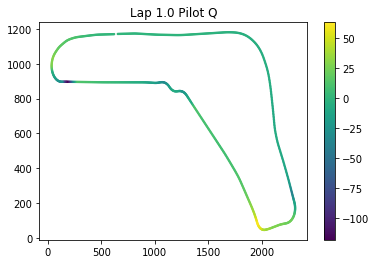

In [46]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,1)
plot_q(1.0, ds, evaluation, f, ax, 'policy', save_fig=False, path='./')

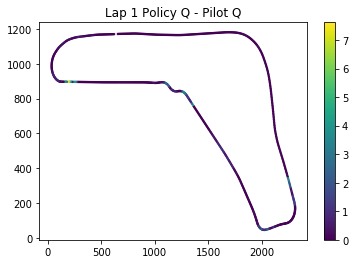

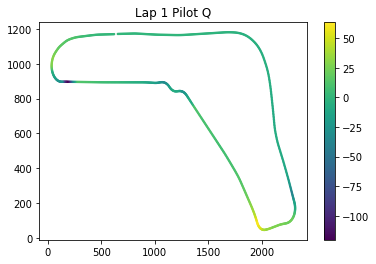

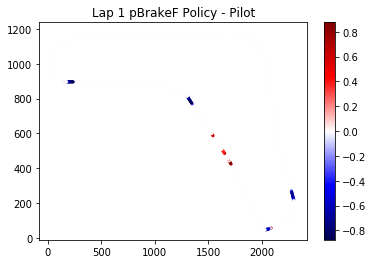

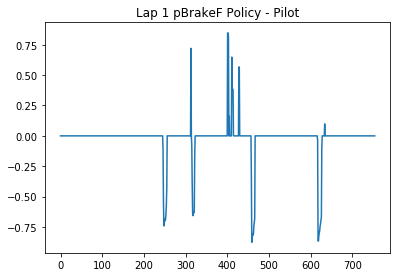

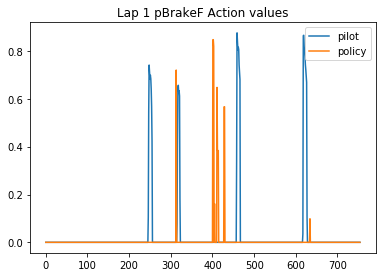

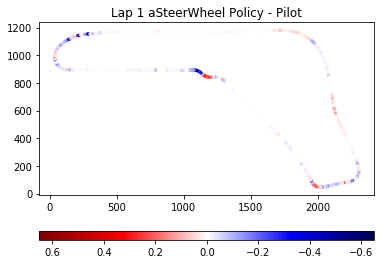

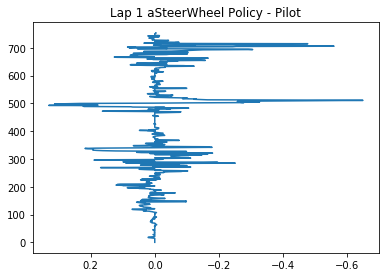

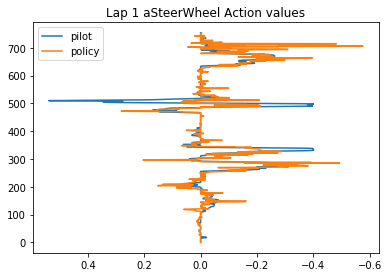

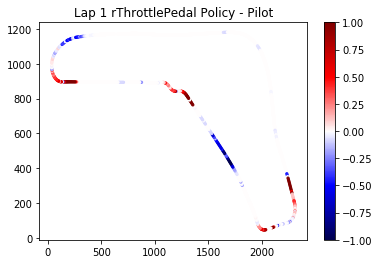

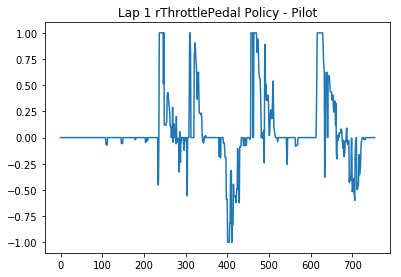

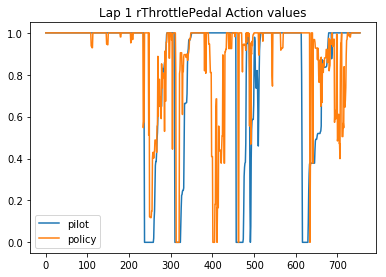

In [48]:
laps = list(evaluation.keys())
laps_to_analyse = [1]
for lap in laps_to_analyse:
    f, ax = plt.subplots(1,1)
    plot_q_delta(lap, ds, evaluation, f, ax)
    f, ax = plt.subplots(1,1)
    plot_q(lap, ds, evaluation, f, ax, 'pilot')
    for i in range(len(action_cols)):
        f, ax = plt.subplots(1,1)
        plot_action_delta(lap, i, ds, evaluation, f, ax)

In [49]:
with open(os.path.join('../umberto/', 'pippo.pkl'), 'rb') as a:
    alg = pickle.load(a)
    
et_A = alg._policy.Q._regressor[0]
et_B = alg._policy.Q._regressor[1]
variables = state_cols + action_cols

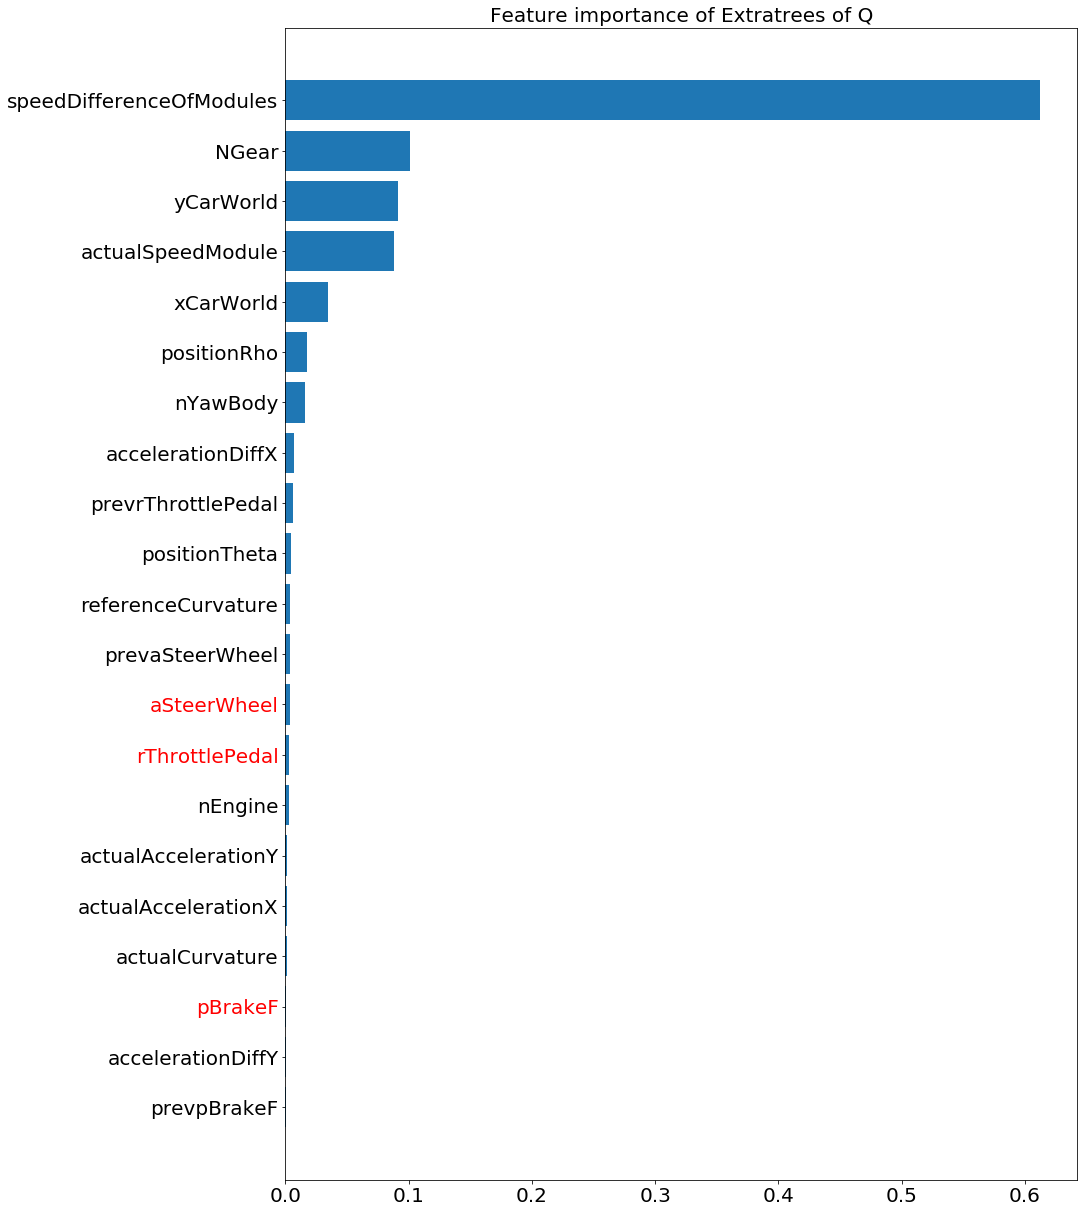

In [50]:
plot_feature_importance(variables, et_A.feature_importances_)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


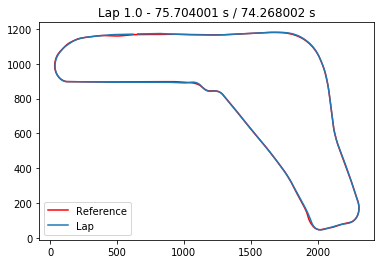

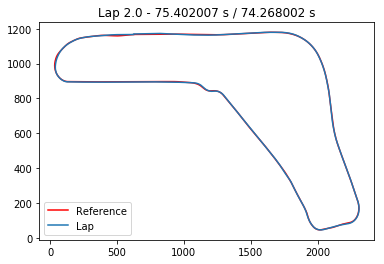

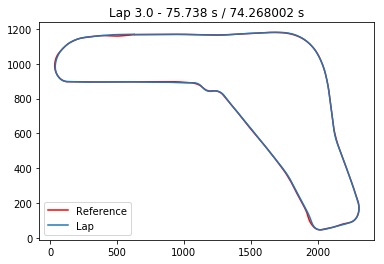

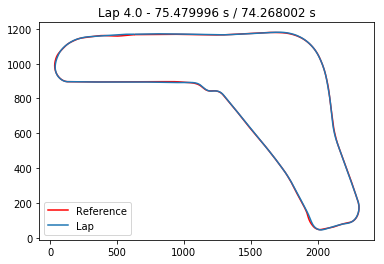

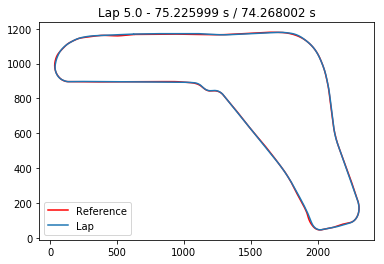

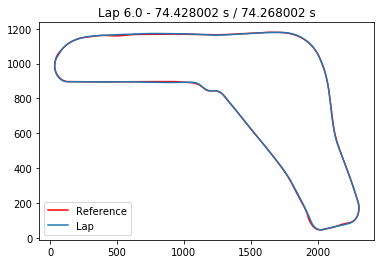

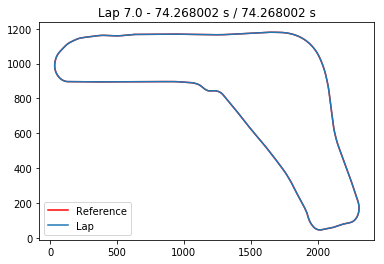

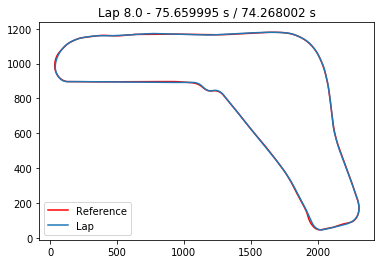

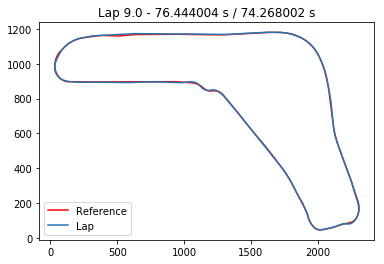

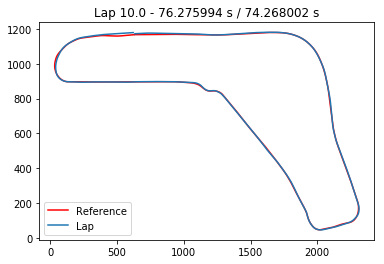

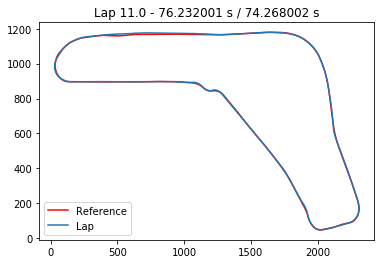

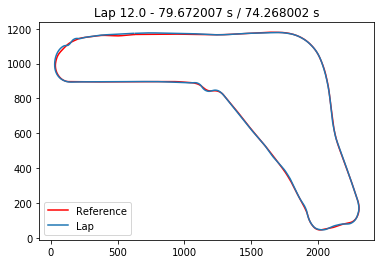

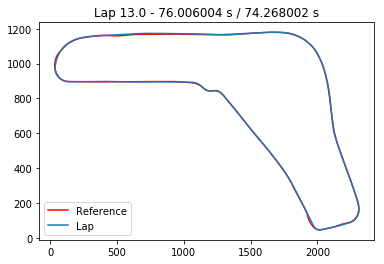

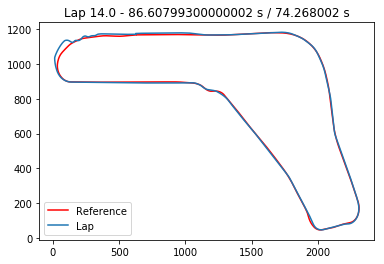

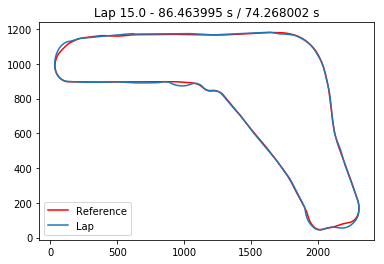

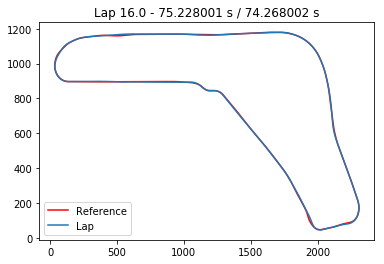

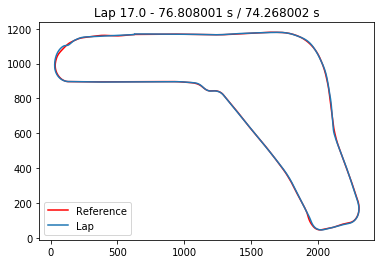

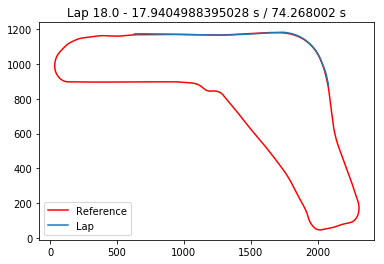

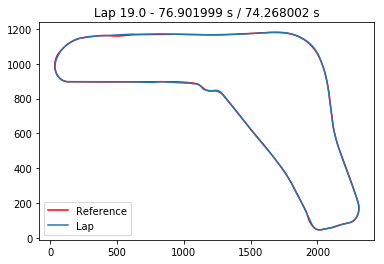

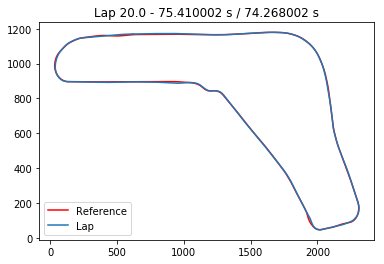

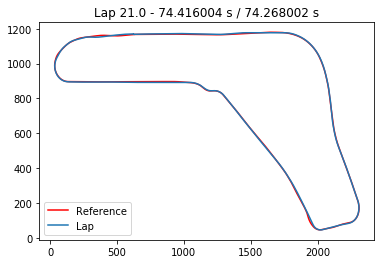

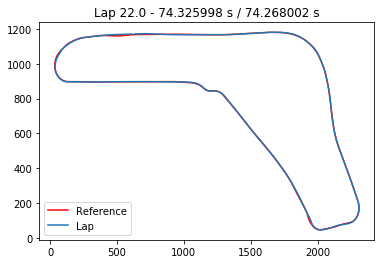

In [51]:
laps = list(evaluation.keys())
for lap in laps:
    f, ax = plt.subplots(1,1)
    plot_trajectories(ds, lap, f, ax, ds[ds.NLap == 7])